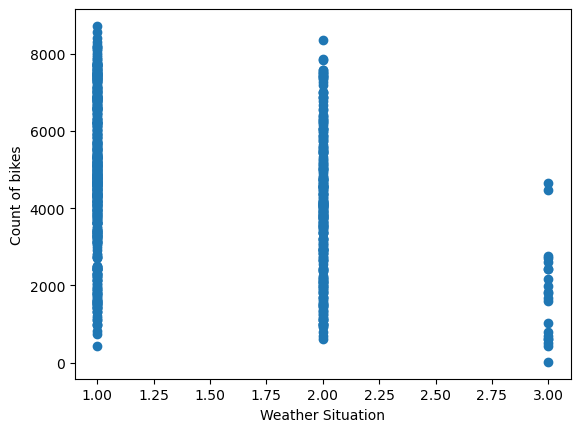

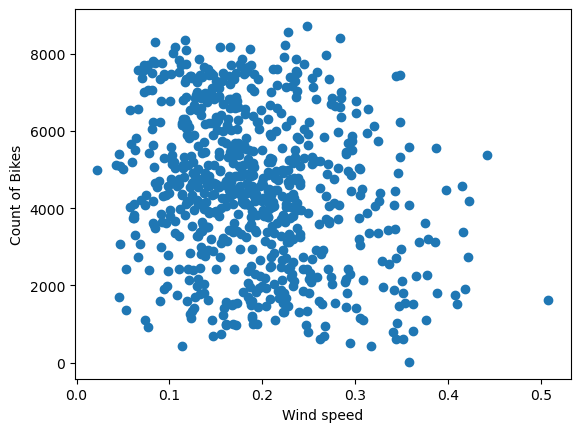

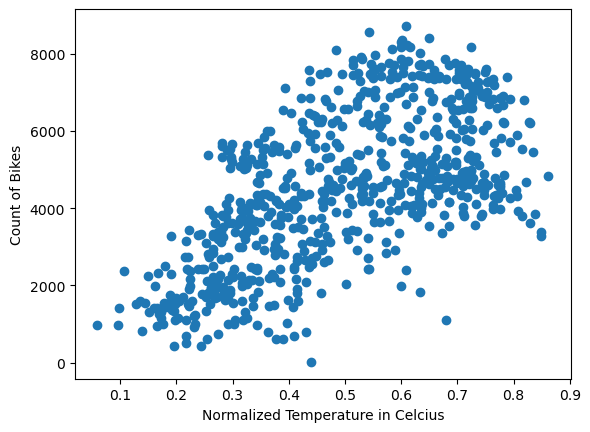

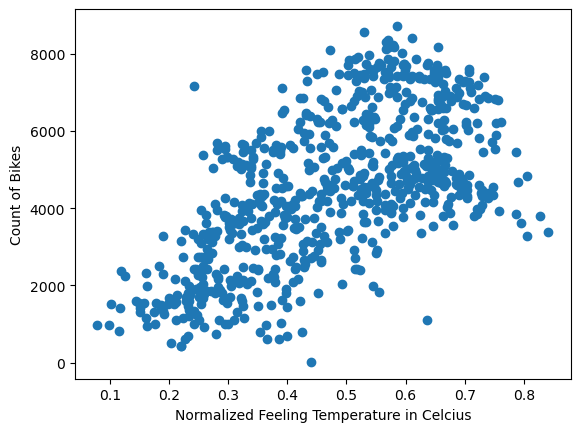

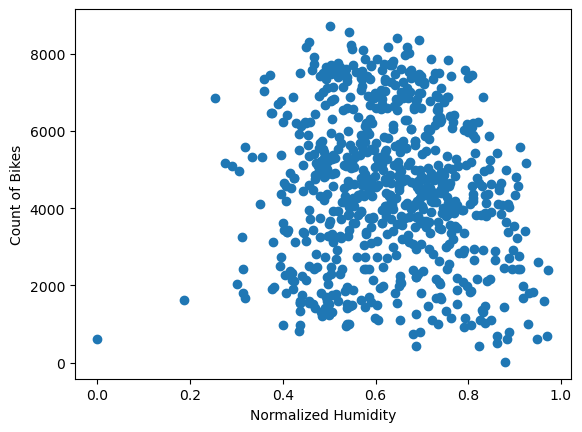

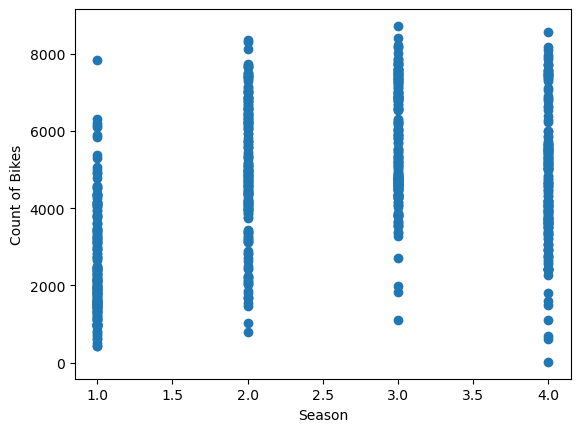

[[0.         0.         0.         ... 0.37351738 0.82862005 0.2846062 ]
 [0.         0.         0.         ... 0.36054067 0.71577069 0.46621455]
 [0.         0.         0.         ... 0.14483011 0.44963805 0.4657404 ]
 ...
 [0.         1.         1.         ... 0.2143932  0.77420771 0.21026043]
 [0.         1.         1.         ... 0.20034801 0.49700051 0.67693615]
 [0.         1.         1.         ... 0.18956733 0.59383033 0.27306151]]


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("day.csv")    #read file.
X1=df[["season","yr","mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"]]
#attempt at adding calculated value, can be ignored
#print(len(X1))
#calcvalue1 = X1.temp.div(X1.windspeed)
#X1["temp/windspeed"] = calcvalue1
#print(len(X1))

#Checking if the dataframe contains empty cell values.
df.isnull().values.any() #Cleans out any null values in the dataframe 
#Output label
y=df['cnt']

#Plot features and label
plt.figure(0)
plt.scatter(X1['weathersit'],y)
plt.xlabel("Weather Situation")
plt.ylabel("Count of bikes")
plt.show()

plt.scatter(X1['windspeed'],y)
plt.xlabel("Wind speed")
plt.ylabel("Count of Bikes")
plt.show()

plt.scatter(X1['temp'],y)
plt.xlabel("Normalized Temperature in Celcius")
plt.ylabel("Count of Bikes")
plt.show()

plt.scatter(X1['atemp'],y)
plt.xlabel("Normalized Feeling Temperature in Celcius")
plt.ylabel("Count of Bikes")
plt.show()

plt.scatter(X1['hum'],y)
plt.xlabel("Normalized Humidity")
plt.ylabel("Count of Bikes")
plt.show()

plt.scatter(X1['season'],y)
plt.xlabel("Season")
plt.ylabel("Count of Bikes")
plt.show()
from sklearn.preprocessing import MinMaxScaler

#Normalize features using MinMaxScaler.
#Please see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html for more details.

scaler = MinMaxScaler()
X = scaler.fit_transform(X1)
print(X)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#sample code
lin_reg = LinearRegression()
np.random.seed(40)  # to make this code example reproducible

kfold = KFold(n_splits=5, shuffle=True, random_state=42) #--->here k=3 with 3-fold cross validation.
#random_state controls randomness of each fold.
scores = []
for i, (train, test) in enumerate(kfold.split(X, y)):#--->splitting into train and test set.
#Enter your code here. You can refer lab 1 and assignment 1 document for the implementation of
#fit and score.
    lin_reg.fit(X[train], y[train])
    score = lin_reg.score(X[test], y[test])
    scores.append(score)

count = 0
avg = 0
for i in scores:
    avg += i
    count += 1

print(scores)
print(count)
avg = avg/count
print(avg)

[0.8276670090367212, 0.7456383608236494, 0.8128796167936319, 0.7217399276287707, 0.8081604637203466]
5
0.7832170756006239


In [64]:
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# dataframes
#import pandas as pd
# computation
#import numpy as np
# visualization
import matplotlib.pyplot as plt
d = 2
scores_poly = []
#Sample code
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  #------>In this example, k=3
for i, (train, test) in enumerate(kfold.split(X, y)):
     
        poly_model = PolynomialFeatures(d)  #polynomialFeatures class to transform our training data, adding the higher degree 'd' of each feature in the training set as a new feature
        #Enter you code here-->This is similar to k-fold cross validation for linear regression except that now, we are
        #using polynomial features.
        X_poly = poly_model.fit_transform(X)
        #poly_model.fit_transform(X[train], y[train])
        lin_reg.fit(X_poly[train], y[train])
        score = lin_reg.score(X_poly[test], y[test])
        scores_poly.append(score)
        
count = 0
avg_poly = 0
for i in scores_poly:
    avg_poly += i
    count += 1

print(scores_poly)
print(count)
avg_poly = avg_poly/count
print(avg_poly)

[0.7062850148095341, 0.44998397669935786, 0.8649071546886962, 0.7315690717976822, 0.8040006201154277]
5
0.7113491676221395


In [57]:
#merge the above 2 steps for comparing linear and polynomial regression.
print("Linear regression with K-fold split = 3: \n")
print(scores)
print(avg)
print("=======================================")
print("Polynomial regression with degree 2, K = 3: \n")
print(scores_poly)
print(avg_poly)

Linear regression with K-fold split = 3: 

[0.8276670090367212, 0.7456383608236494, 0.8128796167936319, 0.7217399276287707, 0.8081604637203466]
0.7832170756006239
Polynomial regression with degree 2, K = 3: 

[0.7062850148095341, 0.44998397669935786, 0.8649071546886962, 0.7315690717976822, 0.8040006201154277]
0.7113491676221395
